In [1]:
# set up environment
import pandas as pd
import csv 
import numpy as np 
import requests
import urllib.parse
from geopy.geocoders import Nominatim
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS


D:\Downloaded programs\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load data
df_info=[]
df_reviews=[]
df_info = pd.read_csv('restaurant_info2.csv')
df_reviews = pd.read_csv('reviews3.csv')

In [3]:
# clean and preprocess data
# remove duplicate data 
df_info=df_info.drop_duplicates()


In [4]:
#remove '#' in front of number in ranking and convert it to a number
df_info['rank']=df_info['rank'].str.lstrip('#')
df_info['rank']=[rank.replace(',','') for rank in df_info['rank']]
df_info['rank']=df_info['rank'].astype(int)
# remove ranks above 100 
df_info=df_info[df_info['rank']<100]

#replace price range symbols with three tiers, cheap, mid-range and high-end
price_dict = {'$':'cheap','$$ - $$$':'mid-range','$$$$':'high-end'} 
df_info['price range']=df_info['price range'].replace(price_dict)

#clean up location data and get latitude and longitude for visualisation
location1=[]
latitude1=[]
longitude1=[]
latitude2=[]
longitude2=[]
locator = Nominatim(user_agent="KLCXgeo")
for address in df_info['address']:
    location1 = locator.geocode(address)
    try:
        latitude1 = location1.latitude
        longitude1 = location1.longitude
        latitude2.append(latitude1)
        longitude2.append(longitude1)
    except:
        latitude2.append('nan')
        longitude2.append('nan')
df_info['latitude']=latitude2
df_info['longitude']=longitude2

In [5]:
# drop nan in reviews 
df_reviews = df_reviews.dropna()
df_reviews['rating']=df_reviews['rating'].astype(str)
# clean review data by adding decimal to rating
a=[]
for rating in df_reviews['rating']:
    rating=rating.replace('.','')
    rating1 = rating[:1]+"."+rating[1:]
    a.append(rating1)
df_reviews['rating']=a
df_reviews['rating']=df_reviews['rating'].astype(float).astype(int)

In [6]:
# EDA 
# location 
x1=df_info['location'].value_counts()
print(x1)


Islington                   7
Hampstead Heath             6
Southwark                   5
Marylebone                  5
City of London              4
Kensington and Hyde Park    4
Camden                      4
Notting Hill                3
Hammersmith                 3
Greenwich                   3
Shoreditch                  3
Whitechapel                 3
Spitalfields                3
Chelsea                     2
Brixton                     2
Covent Garden               2
Earls Court                 2
Lavender Hill               2
Cockfosters                 2
Tottenham                   2
Bloomsbury                  2
Wandsworth                  1
Fulham                      1
Westminster                 1
Fitzrovia                   1
Tooting                     1
Camberwell                  1
Stoke Newington             1
Streatham Hill              1
Kings Cross                 1
Leyton                      1
Bexleyheath                 1
Balham                      1
Cricklewoo

In [7]:
#cuisine
x2 = df_info['cuisine'].value_counts()
print(x2)

Indian           20
Italian          13
Cafe              8
Mediterranean     8
Lebanese          6
International     5
Steakhouse        5
Seafood           5
French            4
European          3
Japanese          2
African           2
Bar               2
Pizza             1
American          1
Pub               1
Brew Pub          1
British           1
Asian             1
Healthy           1
Latin             1
Fast Food         1
Barbecue          1
Mexican           1
Name: cuisine, dtype: int64


In [8]:
#price range 
x3=df_info['price range'].value_counts()
print(x3)

mid-range    76
cheap        12
high-end      6
Name: price range, dtype: int64


In [9]:
# average rating 
x4=df_info['average rating'].value_counts()
print(x4)

5.0    69
4.5    22
4.0     3
Name: average rating, dtype: int64


D:\Downloaded programs\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


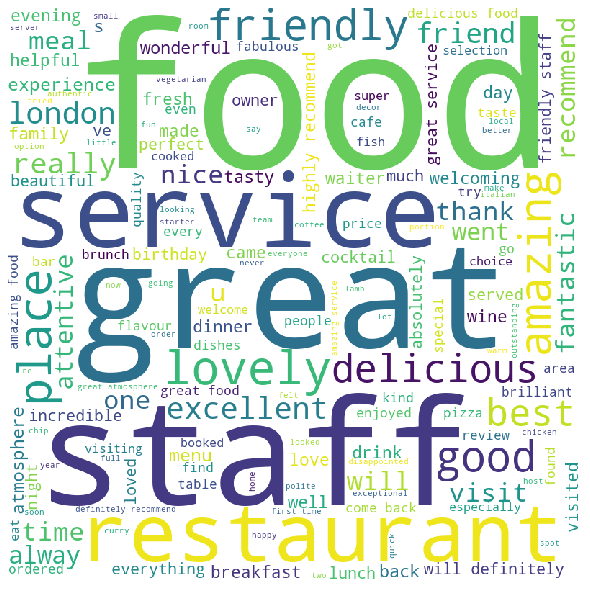

In [10]:
#build word cloud for ratings >4.0
comment_words = ''
stopwords = set(STOPWORDS)
dfx=df_reviews[df_reviews['rating']>=np.int(4.0)]
# iterate through the csv file
for val in dfx.review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

D:\Downloaded programs\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


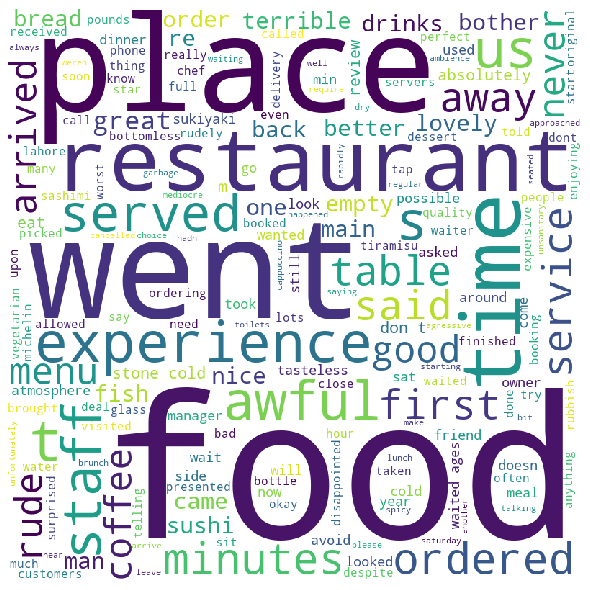

In [11]:
#build word cloud for ratings <2.5
comment_words1 = ''
stopwords1 = set(STOPWORDS)
dfx1=df_reviews[df_reviews['rating']<=np.int(1.5)]
# iterate through the csv file
for val1 in dfx1.review:
     
    # typecaste each val to string
    val = str(val1)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words1 += " ".join(tokens)+" "
 
wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords1,
                min_font_size = 10).generate(comment_words1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [12]:
# export csv for visualisation in tableau
df_reviews.to_csv('tripadvisorreviews.csv')
df_info.to_csv('tripadvisorrestaurantinfo.csv')